In [101]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv('C:\\Users\\RedPr\\Downloads\\Salaries.csv')

In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
df.shape

(397, 6)

In [6]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

# Checking Null Values


In [7]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Since there are no null values, we proceed.


# Visualization

In [8]:
df_n=df[['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary']].copy()

In [9]:
df_n.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


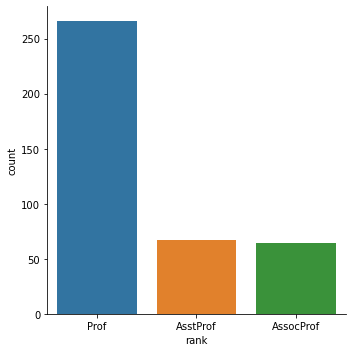

In [10]:
import seaborn as sns

a=sns.catplot(x='rank',data=df_n, kind="count")
print(df_n["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


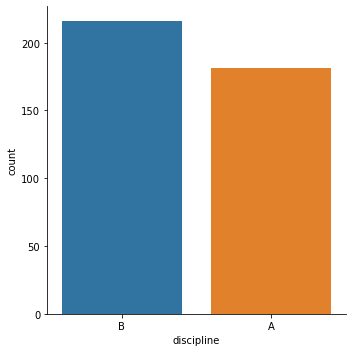

In [11]:
b=sns.catplot(x='discipline',data=df_n, kind="count")
print(df_n["discipline"].value_counts())

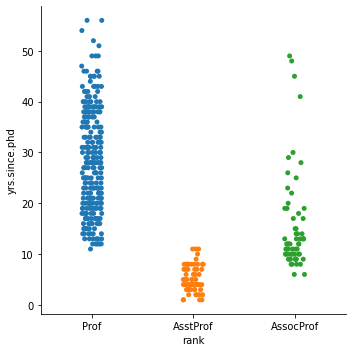

In [12]:
c=sns.catplot(x="rank",y='yrs.since.phd',data=df_n)

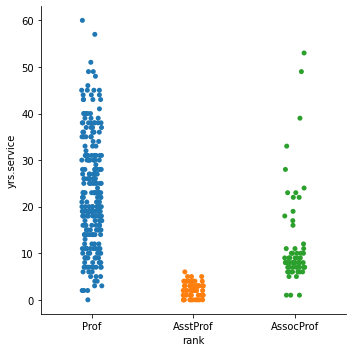

In [13]:
b=sns.catplot(x='rank',y='yrs.service',data=df_n)

Male      358
Female     39
Name: sex, dtype: int64


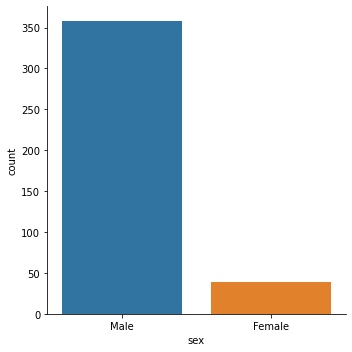

In [14]:
b=sns.catplot(x='sex',data=df_n, kind="count")
print(df_n["sex"].value_counts())

C:\Users\RedPr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


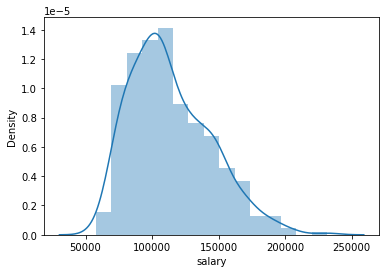

In [15]:
c=sns.distplot(df_n["salary"],kde=True)

In [16]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


<AxesSubplot:>

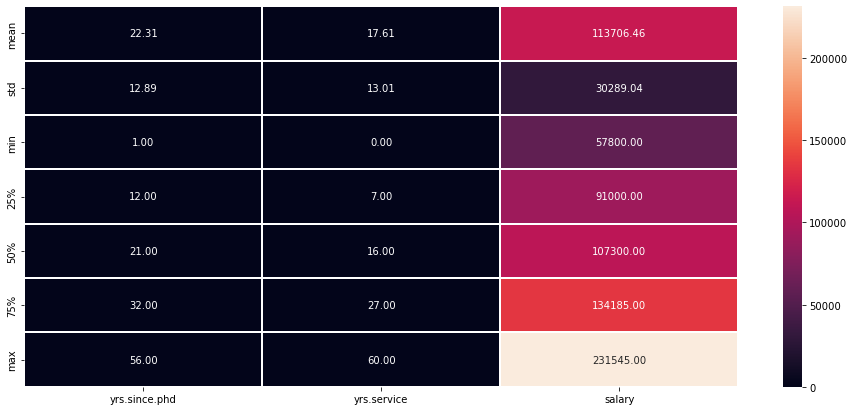

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,7))
sns.heatmap(df.describe()[1:],annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

# Encoding

In [67]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()


In [68]:
df["rank"]=enc.fit_transform(df["rank"].values.reshape(-1,1))
print (df["rank"])

0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
392    2.0
393    2.0
394    2.0
395    2.0
396    1.0
Name: rank, Length: 397, dtype: float64


In [69]:
df["discipline"]=enc.fit_transform(df["discipline"].values.reshape(-1,1))
print (df["discipline"])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
392    0.0
393    0.0
394    0.0
395    0.0
396    0.0
Name: discipline, Length: 397, dtype: float64


In [70]:
df["sex"]=enc.fit_transform(df["sex"].values.reshape(-1,1))
print (df["sex"])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
392    1.0
393    1.0
394    1.0
395    1.0
396    1.0
Name: sex, Length: 397, dtype: float64


# Correlation

In [22]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


In [23]:
df.corr()["salary"].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

<AxesSubplot:>

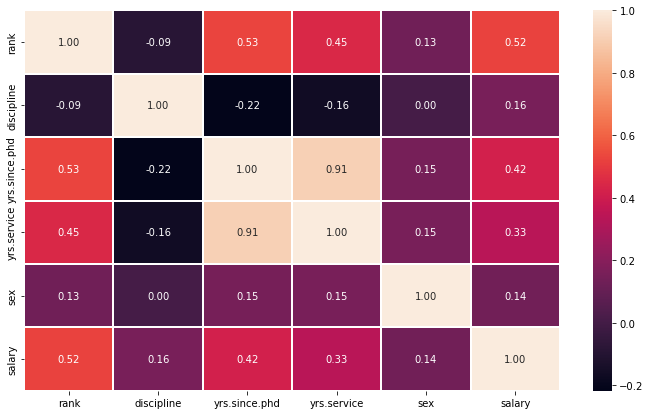

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="White",fmt=".2f")

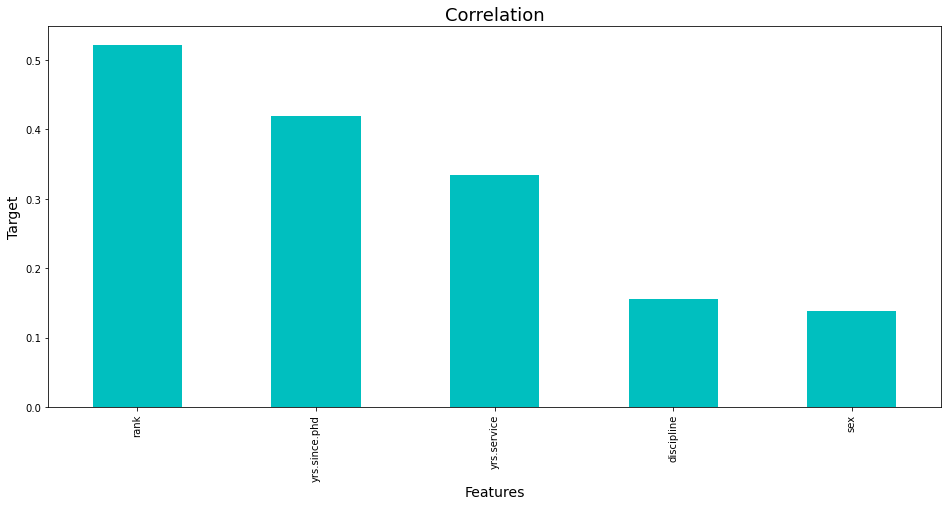

In [25]:
plt.figure(figsize=(16,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()


# Skewness

In [71]:
df.skew().sort_values()

sex             -2.709958
rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

Keeping +/- 0.5 as range of skewness, column that fall under these are
- sex
- rank
- yrs.service
- salary

Since sex and rank is categorical feature and salary is target variable, we cannot perform the skewness.

We perform skewness only on yrs.service

# Separating Feature and Target 

In [72]:
x=df.drop("salary",axis=1)
x.head()

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0


In [73]:
y=df["salary"]
y.head()

0    139750
1    173200
2     79750
3    115000
4    141500
Name: salary, dtype: int64

# Removing Skewnwess

In [74]:
from sklearn.preprocessing import power_transform

In [99]:
x=power_transform(x)
x

array([[ 0.69005113,  0.91540317, -0.12729454,  0.21534448,  0.3300584 ],
       [ 0.69005113,  0.91540317, -0.04917821,  0.06703275,  0.3300584 ],
       [-1.09153554,  0.91540317, -1.62812069, -1.26587219,  0.3300584 ],
       ...,
       [ 0.69005113, -1.09241483,  1.39552477,  0.68314877,  0.3300584 ],
       [ 0.69005113, -1.09241483,  0.32017198, -0.0101666 ,  0.3300584 ],
       [-1.09153554, -1.09241483, -1.13497737, -1.11445781,  0.3300584 ]])

In [125]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,0.690051,0.915403,-0.127295,0.215344,0.330058
1,0.690051,0.915403,-0.049178,0.067033,0.330058
2,-1.091536,0.915403,-1.628121,-1.265872,0.330058
3,0.690051,0.915403,1.565162,1.459847,0.330058
4,0.690051,0.915403,1.279680,1.558761,0.330058


# OUTLIERS

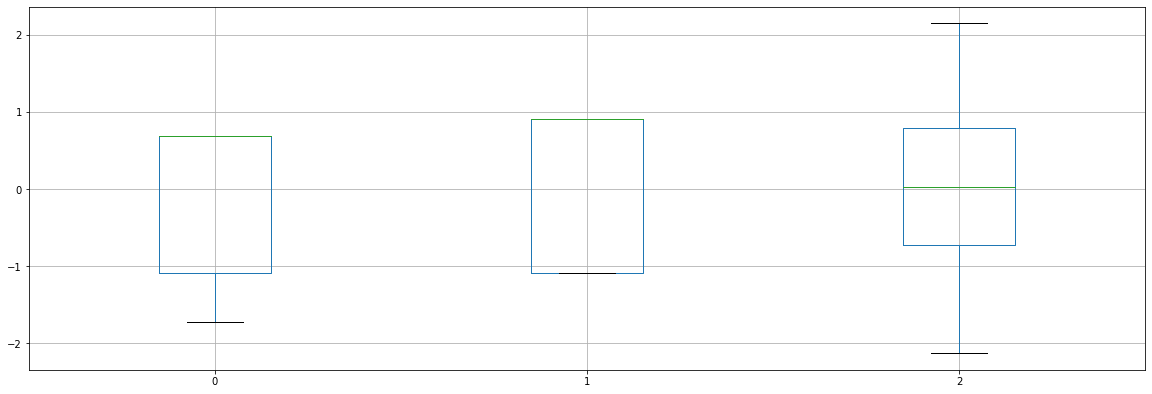

In [126]:
import matplotlib.pyplot as plt
x.iloc[:,0:3].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [127]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all().all()

False

In [128]:
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  47,  48,  52,  63,  68,  84,  90, 103,
        114, 119, 123, 127, 132, 133, 148, 153, 179, 186, 218, 230, 231,
        233, 237, 245, 253, 254, 274, 316, 323, 332, 334, 341, 358, 361],
       dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64))

The Outlier are present in the feature categorical column (4) sex, so we cannot remove them.

In [152]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500


# Scaling

In [132]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import train_test_split

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i}, training accuracy: {r2_score(y_train,pred_train)}")
    print(f"At random state {i}, testing accuracy: {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0, training accuracy: 0.40349138663881534
At random state 0, testing accuracy: 0.455245641339059


At random state 1, training accuracy: 0.4018333696541271
At random state 1, testing accuracy: 0.4674350870555999


At random state 2, training accuracy: 0.41938252774542717
At random state 2, testing accuracy: 0.39593312740315423


At random state 3, training accuracy: 0.43169651967857003
At random state 3, testing accuracy: 0.35513448859381613


At random state 4, training accuracy: 0.4285741114021422
At random state 4, testing accuracy: 0.346528328794648


At random state 5, training accuracy: 0.4351303600965115
At random state 5, testing accuracy: 0.3302669872141736


At random state 6, training accuracy: 0.405522774611501
At random state 6, testing accuracy: 0.4576040462727775


At random state 7, training accuracy: 0.39900487918474303
At random state 7, testing accuracy: 0.48971430225185464


At random state 8, training accuracy: 0.41444456926351125
At random state 8,

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=99)

In [136]:
lr.fit(x_train,y_train) 
pred_train=lr.predict(x_train)

In [137]:
print(r2_score(y_test,pred_test))

0.4611800213466759


# Cross Validations

In [138]:
train_ac=r2_score(y_train,pred_train)
test_ac=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cv= {j} cv score is {cv_mean} and accuracy for training is {train_ac} and testing is {train_ac}")
    print("\n")


At cv= 2 cv score is 0.3669826509468479 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536


At cv= 3 cv score is 0.36129201345411577 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536


At cv= 4 cv score is 0.3703039399659669 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536


At cv= 5 cv score is 0.3538036561778346 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536


At cv= 6 cv score is 0.37734759340899365 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536


At cv= 7 cv score is 0.3727833510644444 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536


At cv= 8 cv score is 0.3798515082084586 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536


At cv= 9 cv score is 0.3555350003274418 and accuracy for training is 0.4054015358555536 and testing is 0.4054015358555536




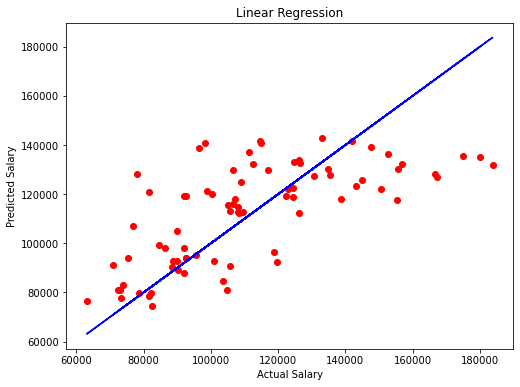

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Linear Regression")
plt.show()

# Regularization

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [141]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
ls_score_train*100

40.539847048520784

In [142]:
lss=r2_score(y_test,pred_ls)
lss*100

46.13044088129096

In [143]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

35.4180824634637

# Ensemble Technique

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features' : ["auto","sqrt","log2"]}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [145]:
rf=RandomForestRegressor(criterion='mae',max_features="log2")
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print('Training r2',train_r2)

rfs=r2_score(y_test,pred_decision)
print('R2 Score:', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)


Training r2 0.8301976129789906
R2 Score: 55.16377965339754
Cross Val Score: 29.323456568479845


# Saving Model

In [146]:
import pickle
filename='sal.pk1'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [147]:
loaded_model=pickle.load(open('sal.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

55.16377965339754


In [148]:
conc=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conc

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
Predicted,97507.47,122078.205,113341.115,133257.035,87272.235,140311.125,137937.12,129905.1,122219.77,136578.395,...,111653.655,113646.845,130270.78,118248.175,101258.55,118167.11,102103.76,81177.79,136248.465,124606.075
Original,97507.47,122078.205,113341.115,133257.035,87272.235,140311.125,137937.12,129905.1,122219.77,136578.395,...,111653.655,113646.845,130270.78,118248.175,101258.55,118167.11,102103.76,81177.79,136248.465,124606.075
